**Part One**

In [1]:
import os
import json  # Import the json module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to read and analyze each JSON file
def analyze_json_file(file_path):
    with open(file_path, 'r') as f:
        json_data = json.load(f)
        return json_data

# Function to iterate through all files in the folder and load data into a DataFrame
def load_data_from_folder(folder_path):
    data_list = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            data = analyze_json_file(file_path)
            data_list.append(data)
    return pd.DataFrame(data_list)

# Call the function with the folder path where the JSON files are located
folder_path = '/Users/tejasrajput/Desktop/Job ads analysis/destination_folder'

df = load_data_from_folder(folder_path)

# Task 1: Count the total number of adverts
total_adverts = df.shape[0]
print("Total number of adverts:", total_adverts)


Total number of adverts: 1999996


In [6]:
# Task 2: Count the number of ads for full-time and part-time jobs
full_time_ads = df[df['fullTime'] == True].shape[0]
part_time_ads = df[df['partTime'] == True].shape[0]
print("Number of full-time job ads:", full_time_ads)
print("Number of part-time job ads:", part_time_ads)

Number of full-time job ads: 1719322
Number of part-time job ads: 227636


0         2020-09-10
1         2020-01-27
2         2020-02-04
3         2020-08-31
4         2019-12-20
             ...    
1999991   2020-11-13
1999992   2020-09-11
1999993   2020-10-09
1999994   2020-10-15
1999995   2020-01-24
Name: datePosted, Length: 1999996, dtype: datetime64[ns]
2019-12-19     1320
2019-12-20     8326
2019-12-21      443
2019-12-22      348
2019-12-23     6303
              ...  
2020-12-13     2417
2020-12-14     6967
2020-12-15    10991
2020-12-16     7146
2020-12-17     6517
Name: datePosted, Length: 365, dtype: int64


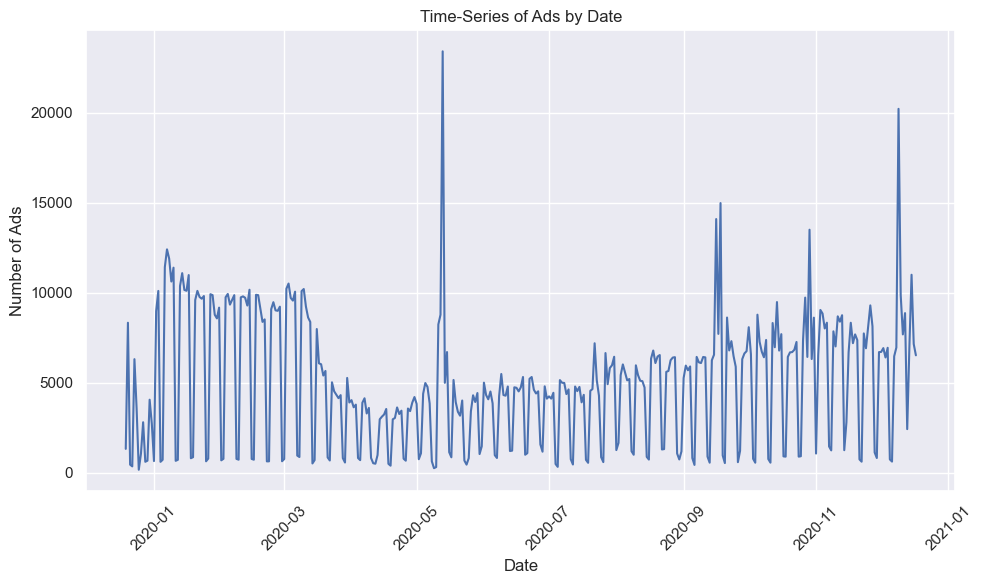

In [7]:
# Task 3: Plot a time-series of the number of ads by day
df['datePosted'] = pd.to_datetime(df['datePosted'], dayfirst=True)
ads_by_day = df['datePosted'].value_counts().sort_index()
sns.set_theme()  # Reset seaborn defaults
print(df['datePosted'] )
print(ads_by_day)
plt.figure(figsize=(10, 6))
#plt.bar(ads_by_day.index, ads_by_day.values)
#plt.plot(ads_by_day.index, ads_by_day.values, color='blue', marker='o', s=100)
plt.plot(ads_by_day.index, ads_by_day.values)
plt.xlabel('Date')
plt.ylabel('Number of Ads')
plt.title('Time-Series of Ads by Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

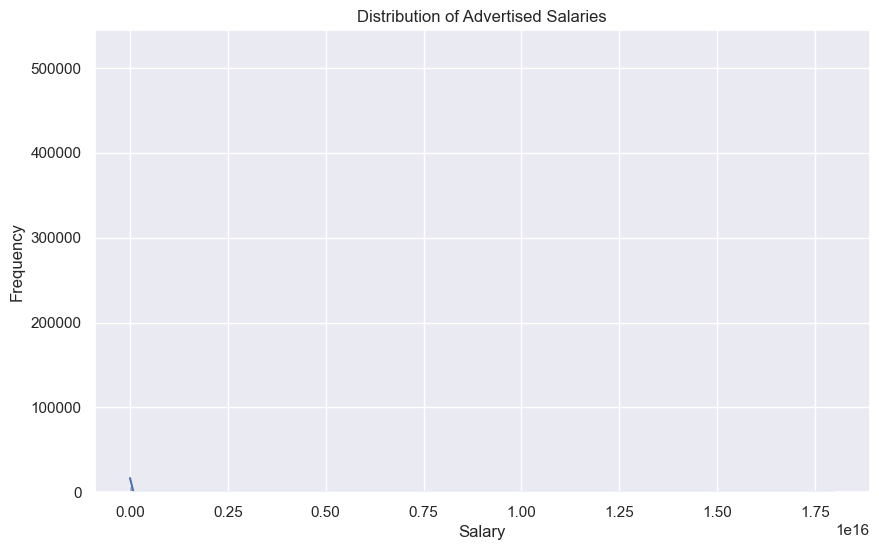

In [13]:

# Task 4: Plot the distribution of advertised salaries
# Cleaning the data: Remove non-numeric characters from the 'salary' column and convert to numeric.
import re

# Task 4: Plot the distribution of advertised salaries
# Cleaning the data: Remove non-numeric characters and handle multiple decimal points in the 'salary' column
df['salary'] = df['salary'].astype(str)  # Convert the 'salary' column to strings
df['salary'] = df['salary'].apply(lambda x: re.sub(r'[^\d.]', '', x))  # Remove non-numeric characters
df['salary'] = df['salary'].apply(lambda x: re.sub(r'(\d)\.(\d)', r'\1\2', x))  # Remove extra decimal points

# Convert to float only if the value is a non-empty string
df['salary'] = df['salary'].apply(lambda x: float(x) if x != '' else None)

plt.figure(figsize=(10, 6))
sns.histplot(df['salary'].dropna(), kde=True)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Advertised Salaries')
plt.grid(True)
plt.show()


[ 3.  0.  1.  4. nan  2.  6.  5.]
0.0    335502
1.0    343334
2.0    365628
3.0    336514
4.0    340786
5.0     59277
6.0     43634
Name: dayOfWeek, dtype: int64
Missing weekdays: ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


/var/folders/75/g9bbk_ns0y1dp1fmplvlfyn80000gn/T/ipykernel_2991/2937080621.py:22: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  missing_weekdays = [weekday for weekday in weekdays if weekday not in df['dayOfWeek'].unique()]


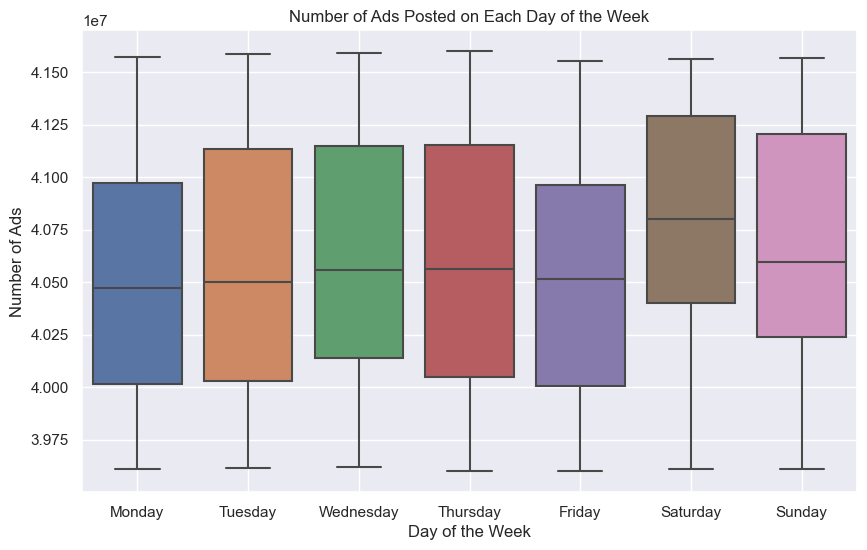

In [14]:
# Task 5: Box and whisker diagram of average number of ads posted on each day of the week

# Convert 'datePosted' column to datetime type
df['datePosted'] = pd.to_datetime(df['datePosted'], dayfirst=True)

# Extract the day of the week (0 for Monday, 1 for Tuesday, and so on) from 'datePosted'
df['dayOfWeek'] = df['datePosted'].dt.dayofweek

# Check the unique values in the 'dayOfWeek' column to verify data for all days of the week
print(df['dayOfWeek'].unique())

# Count the number of ads for each day of the week
ads_by_day_of_week = df['dayOfWeek'].value_counts().sort_index()

# Check the count of ads for each day of the week
print(ads_by_day_of_week)

# Create a list of weekdays to ensure all weekdays are present in the plot
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Check which weekdays are missing in the data
missing_weekdays = [weekday for weekday in weekdays if weekday not in df['dayOfWeek'].unique()]
print("Missing weekdays:", missing_weekdays)

plt.figure(figsize=(10, 6))
sns.boxplot(x='dayOfWeek', y='jobId', data=df)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Ads')
plt.title('Number of Ads Posted on Each Day of the Week')
plt.xticks(range(7), weekdays)
plt.grid(True)
plt.show()

In [15]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install nltk wordcloud


Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [18]:
# Task 1: Find the top 5 users by the total number of job ads posted
top_users = df['employerName'].value_counts().nlargest(5)
print("Top 5 users by the total number of job ads posted:")
print(top_users)

Top 5 users by the total number of job ads posted:
REED                                   69006
Hays Specialist Recruitment Limited    67992
NHS Business Services Authority        61877
Partnership Jobs                       50947
Department of Work & Pensions          30904
Name: employerName, dtype: int64


In [28]:
df['jobTitle'] = df['jobTitle'].astype(str)

In [39]:
# Task 2: List the 5 most common bigrams found in the job titles
nltk.download('punkt')
nltk.download('stopwords')

# Combine all job titles into a single text for processing
job_titles_text = ' '.join(df['jobTitle'])
job_titles_text = job_titles_text.lower()  # Convert to lowercase

# Tokenize the job titles text and remove stopwords
tokens = nltk.word_tokenize(job_titles_text)
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]

# Create bigrams and find the 5 most common ones
bi_grams =list(bigrams(filtered_tokens))
most_common_bigrams = nltk.FreqDist(bi_grams).most_common(5)
print("5 most common bigrams in job titles:")
print(most_common_bigrams)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tejasrajput/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tejasrajput/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


5 most common bigrams in job titles:
[(('care', 'assistant'), 61543), (('support', 'worker'), 60144), (('teaching', 'assistant'), 31503), (('registered', 'nurse'), 29457), (('customer', 'service'), 23512)]


In [40]:
import nltk
from nltk import bigrams
from collections import Counter

/var/folders/75/g9bbk_ns0y1dp1fmplvlfyn80000gn/T/ipykernel_2991/885281190.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_jobs.loc[:, 'datePosted'] = pd.to_datetime(selected_jobs['datePosted'], dayfirst=True)


2019-12-20    1
2019-12-28    1
2020-01-10    1
2020-01-16    1
2020-03-03    1
2020-04-30    1
2020-08-07    2
2020-08-11    1
2020-09-21    1
2020-09-30    1
2020-10-08    1
2020-10-20    1
2020-10-21    1
2020-11-03    1
2020-11-09    2
Name: datePosted, dtype: int64


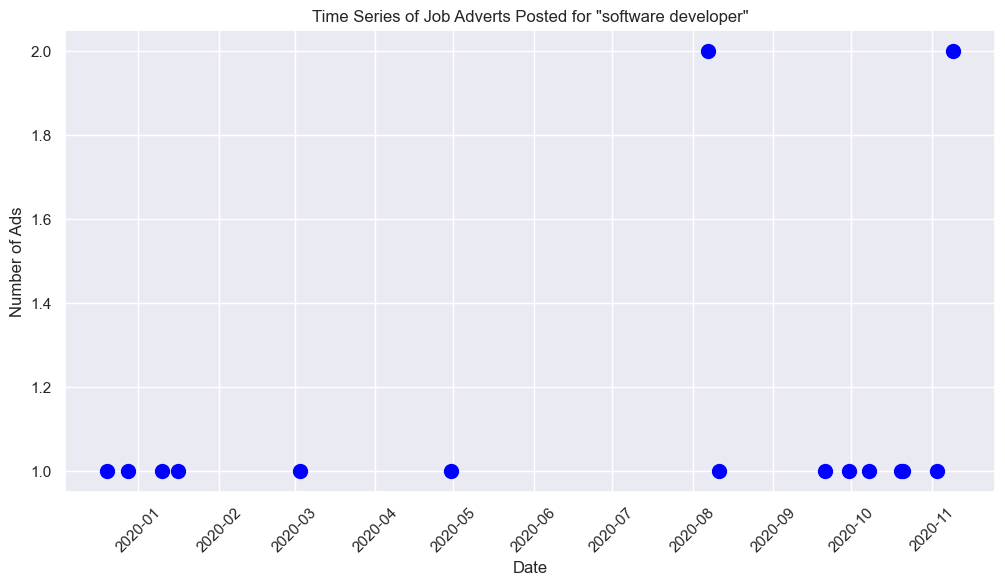

In [41]:
# Task 3: Create a time series of job adverts posted for a particular type of job

job_type = "software developer"  # Replace with the desired job type
selected_jobs = df[df['jobTitle'].str.contains(job_type)]

# Time series of job adverts posted
selected_jobs.loc[:, 'datePosted'] = pd.to_datetime(selected_jobs['datePosted'], dayfirst=True)
ads_by_date = selected_jobs['datePosted'].value_counts().sort_index()
print(ads_by_date)

# Check if the selected_jobs DataFrame is empty
if selected_jobs.empty:
    print(f"No job adverts found for the job type: '{job_type}'")
else:
    plt.figure(figsize=(12, 6))
    plt.scatter(ads_by_date.index, ads_by_date.values, color='blue', marker='o', s=100)
    plt.xlabel('Date')
    plt.ylabel('Number of Ads')
    plt.title(f'Time Series of Job Adverts Posted for "{job_type}"')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

2019-12-19     5
2019-12-20    18
2019-12-23    21
2019-12-24     7
2019-12-26     2
              ..
2020-12-13     6
2020-12-14    20
2020-12-15    16
2020-12-16    15
2020-12-17    14
Name: datePosted, Length: 314, dtype: int64


/var/folders/75/g9bbk_ns0y1dp1fmplvlfyn80000gn/T/ipykernel_2991/1759092420.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_jobs.loc[:, 'datePosted'] = pd.to_datetime(selected_jobs['datePosted'], dayfirst=True)


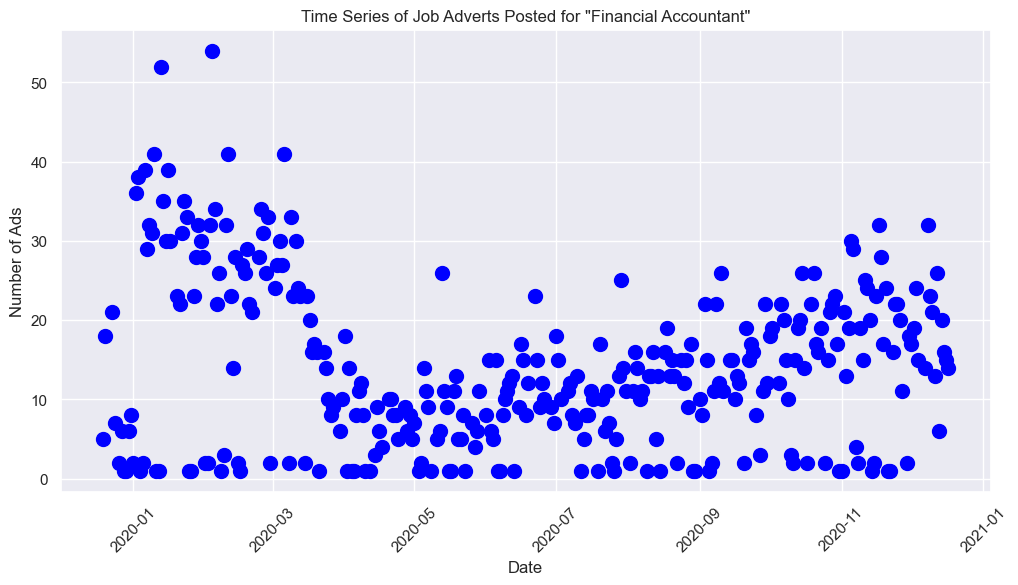

In [43]:
# Task 3: Create a time series of job adverts posted for a particular type of job

job_type = "Financial Accountant"  # Replace with the desired job type
selected_jobs = df[df['jobTitle'].str.contains(job_type)]

# Time series of job adverts posted
selected_jobs.loc[:, 'datePosted'] = pd.to_datetime(selected_jobs['datePosted'], dayfirst=True)
ads_by_date = selected_jobs['datePosted'].value_counts().sort_index()
print(ads_by_date)

# Check if the selected_jobs DataFrame is empty
if selected_jobs.empty:
    print(f"No job adverts found for the job type: '{job_type}'")
else:
    plt.figure(figsize=(12, 6))
    plt.scatter(ads_by_date.index, ads_by_date.values, color='blue', marker='o', s=100)
    plt.xlabel('Date')
    plt.ylabel('Number of Ads')
    plt.title(f'Time Series of Job Adverts Posted for "{job_type}"')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

2019-12-19     2
2019-12-20     5
2019-12-24     1
2020-01-03    13
2020-01-06     4
              ..
2020-12-09    45
2020-12-10     6
2020-12-11     3
2020-12-12     2
2020-12-14     1
Name: datePosted, Length: 173, dtype: int64


/var/folders/75/g9bbk_ns0y1dp1fmplvlfyn80000gn/T/ipykernel_2991/1106578884.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_jobs.loc[:, 'datePosted'] = pd.to_datetime(selected_jobs['datePosted'], dayfirst=True)


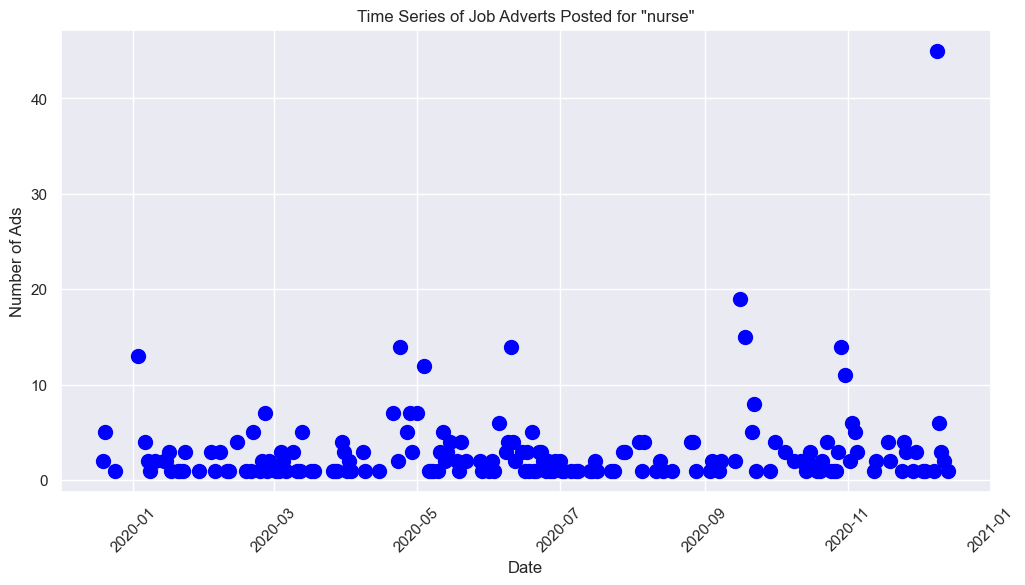

In [44]:
job_type = "nurse"  # Replace with the desired job type
selected_jobs = df[df['jobTitle'].str.contains(job_type)]

# Time series of job adverts posted
selected_jobs.loc[:, 'datePosted'] = pd.to_datetime(selected_jobs['datePosted'], dayfirst=True)
ads_by_date = selected_jobs['datePosted'].value_counts().sort_index()
print(ads_by_date)

# Check if the selected_jobs DataFrame is empty
if selected_jobs.empty:
    print(f"No job adverts found for the job type: '{job_type}'")
else:
    plt.figure(figsize=(12, 6))
    plt.scatter(ads_by_date.index, ads_by_date.values, color='blue', marker='o', s=100)
    plt.xlabel('Date')
    plt.ylabel('Number of Ads')
    plt.title(f'Time Series of Job Adverts Posted for "{job_type}"')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

In [ ]:
import nltk
from nltk import bigrams
from collections import Counter

# Sample text (replace this with your actual text data)
text = "Natural language processing is a subfield of artificial intelligence that deals with the interaction between computers and humans."

# Tokenize the text into words
words = nltk.word_tokenize(text)

# Get bigrams from the words
bigram_list = list(bigrams(words))

# Count the frequency of each bigram
bigram_freq = Counter(bigram_list)

# Get the 5 most common bigrams
most_common_bigrams = bigram_freq.most_common(5)

# Print the results
print("5 Most Common Bigrams:")
for bigram, count in most_common_bigrams:
    print(f"{bigram[0]} {bigram[1]} - Count: {count}")



In [ ]:


# Tokenize the job titles text and remove stopwords
tokens = nltk.word_tokenize(all_titles_text)
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]

# Create bigrams and find the 5 most common ones
bi_grams = list(bigrams(filtered_tokens))
most_common_bigrams = nltk.FreqDist(bi_grams).most_common(5)
print("5 most common bigrams in job titles:")
print(most_common_bigrams)

**Part Two**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Task 1: Find the top 5 users by the total number of job ads posted
top_users = df['employerName'].value_counts().nlargest(5)
print("Top 5 users by the total number of job ads posted:")
print(top_users)

# Task 2: List the 5 most common bigrams found in the job titles
nltk.download('punkt')
nltk.download('stopwords')

# Combine all job titles into a single text for processing
job_titles_text = ' '.join(df['jobTitle'])
job_titles_text = job_titles_text.lower()  # Convert to lowercase

# Tokenize the job titles text and remove stopwords
tokens = nltk.word_tokenize(job_titles_text)
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]

# Create bigrams and find the 5 most common ones
bi_grams = list(bigrams(filtered_tokens))
most_common_bigrams = nltk.FreqDist(bi_grams).most_common(5)
print("5 most common bigrams in job titles:")
print(most_common_bigrams)


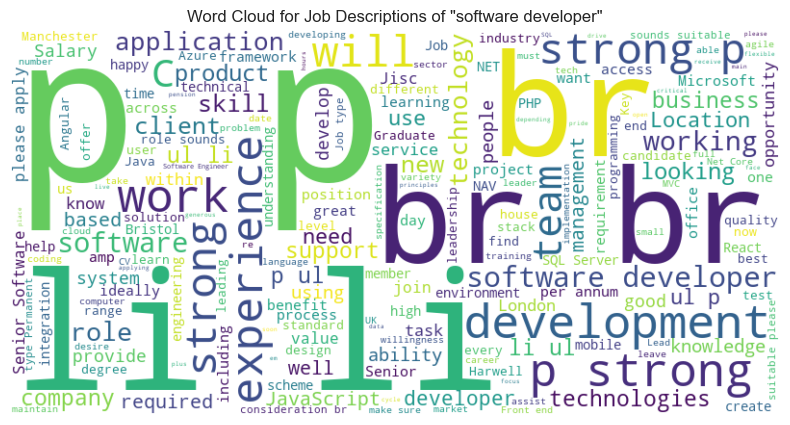

In [46]:
# Task 4: Make a word cloud summarizing the job descriptions for the identified job type
job_descriptions_text = ' '.join(selected_jobs['jobDescription'])

if not job_descriptions_text.strip():
    print(f"No job descriptions found for the job type: \"{job_type}\".")
else:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_descriptions_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Job Descriptions of \"{job_type}\"")
    plt.show()

In [47]:
pip install geopandas matplotlib


Note: you may need to restart the kernel to use updated packages.


**Part Three**

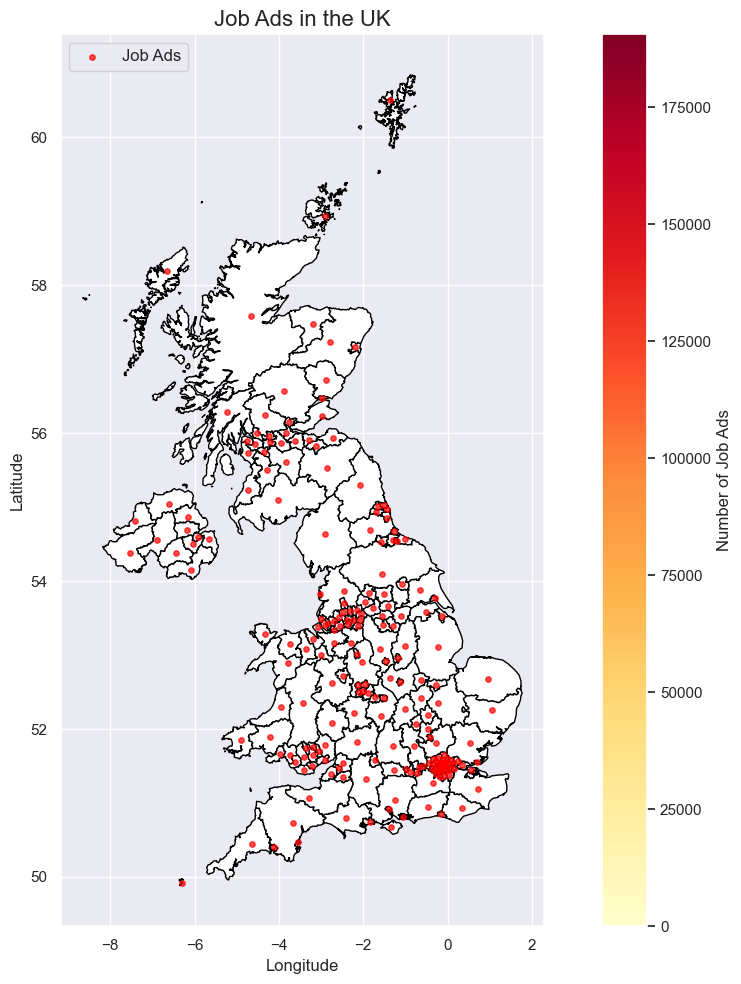

In [49]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Step 1: Load UK county borders data
# Assuming you have County Data-20230221.zip extracted and 'County_Borders.shp' is the shapefile
uk_counties = gpd.read_file('Counties_and_Unitary_Authorities_(December_2021)_UK_BUC.geojson')

# Step 2: Load job ads data from the JSON file
# Replace 'jobs.json' with the actual file name containing the job ads data
jobs_df = df

# Step 3: Match job ad locations to UK counties
location_to_county = {
    "Bristol": "Avon",
    "London": "Greater London",
    # Add other mappings for job ad locations to counties as needed
}

jobs_df['county'] = jobs_df['locationName'].map(location_to_county)

# Step 4: Compute job ad counts in each county
job_counts = jobs_df['county'].value_counts()

# Step 5: Plot the map of the UK
fig, ax = plt.subplots(figsize=(12, 10))

# You can customize the map colors by specifying the color scheme (cmap) and the color boundaries (vmin, vmax)
cmap = 'YlOrRd'  # Yellow-Orange-Red colormap
vmin = 0
vmax = job_counts.max()

# Plot the map of the UK counties
uk_counties.plot(ax=ax, color='white', edgecolor='black')

# Step 6: Plot the job ad locations on the map


jobs_geo = gpd.GeoDataFrame(uk_counties,
                            geometry=gpd.points_from_xy(uk_counties['LONG'], uk_counties['LAT']))
jobs_geo.plot(ax=ax, color='red', markersize=15, alpha=0.7, label='Job Ads')


# Step 7: Add job ad counts to the plot
for idx, row in uk_counties.iterrows():
    count = job_counts.get(row['CTYUA21NM'], 0)
    if count > 0:
        ax.annotate(str(count), xy=(row.geometry.centroid.x, row.geometry.centroid.y), color='black', ha='center', fontsize=10)

# Step 8: Customize the map design and layout
ax.set_title('Job Ads in the UK', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.legend(loc='upper left', fontsize=12)

# Customize the colorbar
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # An empty array is needed for the colorbar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Number of Job Ads', fontsize=12)

# Show the map
plt.tight_layout()
plt.show()
